In [65]:
# Importing libs/packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

**Notes on Data** 	
- Click Status = 1 is a valid click  	
- Click Status > 1 is invalidated click 	
- Conversion: action taken on advertiser landing page (purchase, sign up, site visit). - -Conversion = 0 means no action, Conversion > 0 represents the number of actions 	
- User Agent String Includes: OS, Browser & Version, Device	
- Each Row represents a single click 	"""


**Provided Data and Definitions:
The data represents a set of clicks registered by users searching and clicking on ads on the internet.
- click_status: shows if a click is valid or invalid
- Timestamp: time of the click
- Query Term: the keywords/query the user used in her/his search
- IP Address: unique address of the machine the user used in her search
- User Agent: A string representing OS, Browser data and Device type the user used
- CPC (Cost Per Click): in dollar value
- Conversion: action taken on advertiser landing page (purchase, sign up, site visit).**

**Assignment:
Assume you were to join the team and your task is to utilize the data provided to inform stakeholders on current status, trends and potential optimization strategies.
Some suggestions on how you can approach the exercise:
Understand the underlying data and definitions.
Describe specific metrics you would use to draw business insights and build strategy
Any insights on how to drive more efficient Cost per Conversions?**

Subjects to tackle

- Current status
- Trends
- Potential optimization strategies

Metrics for success?
 - Conversion rates (CVR)
 - CTR (could be noisy/red herring, as clicks may not correlate well with conversions)
 - Impressions
 - Cost per Conversion
 - Cost per Click
 
 
 

Granularity:  Each record in the dataset represents a single click from a user.  Dataset appears to be a subset of ~10,000 rows on the day of January 15, 2015, from 11:00AM to 3:59PM.

In [66]:
#Loading the dataset into a pandas DataFrame
ambi_sandbox = pd.read_csv('AdMarketplace_BI_Sandbox.csv')

### Data Verification

In [67]:
#Ensuring we didn't lose any rows of data when converting from  .xls to .csv
10103 == len(ambi_sandbox['click_status'])

True

In [68]:
ambi_sandbox.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click ', 'Conversions'],
      dtype='object')

### Basic data wrangling to make analysis easier

In [69]:
#Renaming the Cost Per Click column to remove the extra space at the end 
ambi_sandbox.rename(columns={"Cost Per Click " : "Cost Per Click"}, inplace=True)
ambi_sandbox.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click', 'Conversions'],
      dtype='object')

In [70]:
#Converting the Cost Per Click series in the DataFrame from string to float values
sliced_cpc = ambi_sandbox['Cost Per Click'].str.slice(start=1)
floated = sliced_cpc.apply(float)
ambi_sandbox['Cost Per Click'] = floated
ambi_sandbox.head()

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions
0,1,1/29/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,0.28,0
1,1,1/29/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0
2,1,1/29/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0
3,1,1/29/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,0.90,0
4,1,1/29/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,0.17,0


### Before analyzing further, I want to get a better idea of the invalid traffic to make sure we aren't making faulty inferences based on data from bots

In [71]:
#Slicing the invalid traffic data into its own dataframe
valid_click_statuses = [1]
invalidated_click_records = ~ambi_sandbox['click_status'].isin(valid_click_statuses)
invalid_dataframe = ambi_sandbox[invalidated_click_records]
invalid_dataframe.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click', 'Conversions'],
      dtype='object')

### It looks like a non-negligible amount of the records in the dataset are from invalid traffic

In [72]:
print(str(round(1390/10103,4)*100) + " percent of the original rows are invalid.")

13.76 percent of the original rows are invalid.


### We see that there are 1390 rows of invalid traffic contained in the original dataset
### Upshot: Presents a revenue leakage for publishers or additional cost for advertisers.
Possible path towards solution:
- Identify sources of invalid traffic (e.g. IP Addresses linked to datacenters or known bots) to prevent ad fraud.

In [73]:
#Some summary statistics of how much per click is getting wasted by invalid traffic.
invalid_dataframe['Cost Per Click'].describe()

count    1390.000000
mean        0.214122
std         0.140875
min         0.170000
25%         0.170000
50%         0.170000
75%         0.170000
max         1.150000
Name: Cost Per Click, dtype: float64

### Let's turn our focus towards valid traffic:

In [74]:
valid_click_records = ambi_sandbox['click_status'].isin(valid_click_statuses)
valid_dataframe = ambi_sandbox[valid_click_records]
valid_dataframe

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions
0,1,1/29/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,0.28,0
1,1,1/29/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0
2,1,1/29/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0
3,1,1/29/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,0.90,0
4,1,1/29/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,0.17,0
...,...,...,...,...,...,...,...
10097,1,1/29/15 15:59,"[""pediatric job"",""F Craigslist"",""classified new""]",248.53.158.175,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.22,1
10098,1,1/29/15 15:59,"[""facebook"",""face book"",""facebo9ok""]",4.30.46.86,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,0.17,0
10100,1,1/29/15 15:59,"[""google"",""google downs""]",18.182.136.64,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,0.17,0
10101,1,1/29/15 15:59,"[""youtuberepeat""]",74.85.255.161,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,0.17,0


# Comparing metrics between valid and invalid traffic

In [44]:
#Total Conversion rate using complete dataset
total_conversions = ambi_sandbox.loc[(ambi_sandbox['Conversions']>=1)]['Conversions'].size
total_clicks = ambi_sandbox.loc[(ambi_sandbox['click_status']>=1)]['click_status'].size
total_conversion_rate = total_conversions/total_clicks*100
round(total_conversion_rate,3)

13.699

In [45]:
#same as above calculated using only valid clicks
valid_conversions = valid_dataframe.loc[(valid_dataframe['Conversions']>=1)]['Conversions'].size
valid_clicks = valid_dataframe.loc[(valid_dataframe['click_status']>=1)]['click_status'].size
valid_conversion_rate = valid_conversions/valid_clicks*100
round(valid_conversion_rate,3)

15.884

### Cost Per Conversion calculations

In [46]:
# Cost per Conversion in the complete dataset
sum_complete_costper_click = sum(ambi_sandbox['Cost Per Click'])
sum_complete_conversions = sum(ambi_sandbox['Conversions'])
total_cost_per_conversion = sum_complete_costper_click / sum_complete_conversions

complete_cost_per_conversion = round(total_cost_per_conversion, 3)
print(complete_cost_per_conversion)

1.387


#### Same as above, but calculated using the valid only dataset instead of the complete one.

In [47]:
#Cost per Conversion from valid dataset
sum_valid_costper_click =  sum(valid_dataframe['Cost Per Click'])
sum_valid_conversions = sum(valid_dataframe['Conversions'])
valid_cost_per_conversion = sum_valid_costper_click / sum_valid_conversions
round(valid_cost_per_conversion,3)

1.272

In [75]:
# How much lower is the cost per conversion when filtering out invalid traffic?
round(total_cost_per_conversion - valid_cost_per_conversion, 3)


0.115

In [76]:
.1152/total_cost_per_conversion

0.08302772176153943

# Appendix

### Given the opportunity, it would be interesting to explore the distribution of variables within AdMarketplace's data.  Below is some preliminary skeleton code that would be explored further, and is not necessary to review.

In [23]:
conversions_only = ambi_sandbox.loc[(ambi_sandbox['Conversions']>=1)]
grouped_conversions = conversions_only.groupby('Conversions').size().sort_values(ascending=False)
#sns.displot(grouped_conversions)
#conversions_only['Conversions'].describe()
grouped_conversions

Conversions
2     814
1     431
3      68
4      56
5       6
6       6
9       2
13      1
dtype: int64

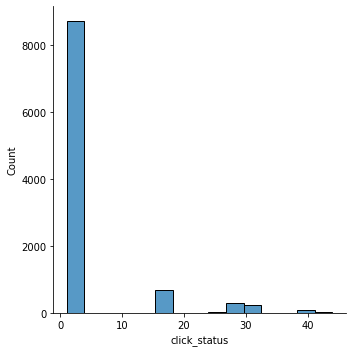

In [24]:
sns.displot(ambi_sandbox['click_status'])

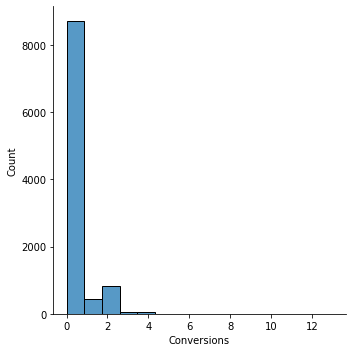

In [25]:
display(sns.displot(ambi_sandbox['Conversions']))

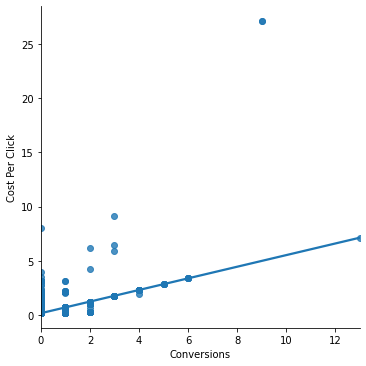

In [26]:
#Examining relationship b/w Conversions and CPC
sns.lmplot(x="Conversions", y="Cost Per Click", data=ambi_sandbox, robust=True)

In [27]:
ambi_sandbox.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click', 'Conversions'],
      dtype='object')

In [28]:
ambi_sandbox.sort_values('Conversions', ascending=False)

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions
5409,1,1/29/15 13:28,"[""mazda"",""car mazda""]",174.156.2.142,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:35.0) G...,7.14,13
1805,1,1/29/15 12:05,"[""turbo tax"",""turbotax"",""free filing""]",220.91.64.196,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,27.10,9
3503,1,1/29/15 12:37,"[""turbo tax"",""turbotax"",""intuit turbotax""]",222.147.111.201,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,27.10,9
1685,1,1/29/15 12:03,"[""auto"",""auto auction of america"",""property au...",2.203.151.191,Mozilla/5.0 (Windows NT 6.3; Win64; x64; Tride...,3.38,6
3293,1,1/29/15 12:33,"[""auto service"",""auto repair"",""repair car""]",67.57.99.87,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,3.38,6
...,...,...,...,...,...,...,...
3491,1,1/29/15 12:37,"[""cheap deals"",""inclusive vacations"",""travel d...",204.242.227.49,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,0.17,0
3492,1,1/29/15 12:37,"[""satellite maps"",""goolg""]",204.242.182.224,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,0.17,0
3493,1,1/29/15 12:37,"[""shopping"",""online shopping"",""shopping cart""]",224.246.143.63,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,0.17,0
3494,1,1/29/15 12:37,"[""credit report"",""credit card help"",""freecredit""]",204.46.254.141,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,0.18,0


In [50]:
#What's the distribution of CPC values like?
cpc_counts = ambi_sandbox['Cost Per Click'].value_counts(sort=True)
sorted_keys = cpc_counts.keys().sort_values()
sorted_keys

Float64Index([0.17, 0.18, 0.19,  0.2, 0.21, 0.22, 0.24, 0.25, 0.26, 0.27, 0.28,
              0.29, 0.31, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39,  0.4, 0.41,
              0.42, 0.44, 0.45, 0.47, 0.48,  0.5, 0.51, 0.52, 0.54, 0.56, 0.57,
              0.59, 0.61, 0.62, 0.64, 0.65, 0.67, 0.69,  0.7, 0.71, 0.72, 0.77,
               0.8, 0.81, 0.83, 0.84, 0.85, 0.86, 0.88,  0.9, 0.91, 0.95,  1.0,
              1.06, 1.07, 1.11, 1.15, 1.17, 1.19,  1.2, 1.21, 1.22, 1.23, 1.24,
              1.33, 1.34, 1.42, 1.53, 1.69, 1.77, 1.81, 1.95,  2.0, 2.05, 2.09,
              2.12, 2.13, 2.26,  2.3, 2.31, 2.34, 2.39, 2.78, 2.85, 3.16, 3.38,
              3.46, 3.94, 4.25, 5.93, 6.15, 6.46, 7.14, 8.01, 9.14, 27.1],
             dtype='float64')